##  1 Valor total de importaciones y exportaciones:

* Importación de las bobliotecas necesarias

In [3]:
import pandas as pd
import seaborn as sns
import locale
sldb = pd.read_csv("synergy_logistics_database.csv")
#esto nos permite ver todo el archivo

In [5]:
# Filtrando especificamente ciertos renglones
exportaciones=sldb[sldb["direction"]=="Exports"]
importaciones=sldb[sldb["direction"]=="Imports"]

##  
* Agrupación de datos:

In [6]:
# Agrupamos los datos de interés
rutas_exp=exportaciones.groupby(["origin","destination","transport_mode"])
rutas_imp=importaciones.groupby(["destination","origin","transport_mode"])

In [7]:
top_rutas_exp=rutas_exp.count()["total_value"].sort_values(ascending=False)
top_rutas_imp=rutas_imp.count()["total_value"].sort_values(ascending=False)

In [8]:
print("Rutas ordenadas en función del volúmen de exportaciones 2015-2020")
top_rutas_exp

Rutas ordenadas en función del volúmen de exportaciones 2015-2020


origin       destination     transport_mode
South Korea  Vietnam         Sea               497
USA          Netherlands     Sea               436
Netherlands  Belgium         Road              374
China        Mexico          Air               330
Japan        Brazil          Sea               306
                                              ... 
France       Russia          Rail               13
Germany      United Kingdom  Air                10
             Mexico          Air                 9
France       Austria         Rail                7
Netherlands  Belgium         Sea                 1
Name: total_value, Length: 163, dtype: int64

In [9]:
print("Rutas ordenadas en función del volúmen de importaciones 2015-2020") 
top_rutas_imp

Rutas ordenadas en función del volúmen de importaciones 2015-2020


destination           origin                transport_mode
Thailand              Singapore             Sea               273
China                 Germany               Sea               233
Japan                 China                 Air               210
Mexico                Japan                 Sea               206
Thailand              Malaysia              Rail              195
                      China                 Road              145
Germany               Spain                 Road              142
United Arab Emirates  China                 Sea               114
China                 Brazil                Sea               113
Thailand              USA                   Sea               109
Japan                 Australia             Sea               102
China                 Mexico                Sea               100
USA                   Mexico                Rail               93
Germany               France                Road               86
Poland           

##  
* Reseteando los índices

In [10]:
top_rutas_exp=top_rutas_exp.reset_index()
#Devuelve el multiindice en varias series
# top_rutas_exp
top_rutas_imp=top_rutas_imp.reset_index()
# top_rutas_imp

##  
* Obteniendo las sumas de los registros de exportaciones e importaciones

In [11]:
#obteniendo la suma de la columna entera
total_exp=top_rutas_exp["total_value"].sum()
total_imp=top_rutas_imp["total_value"].sum()
print(f"Volúmen total de exportaciones: {total_exp}" )
print(f"Volúmen total de importaciones: {total_imp}" )

Volúmen total de exportaciones: 15408
Volúmen total de importaciones: 3648


## 
* Obteniendo la columna frecuencia relativa exportaciones-importaciones

In [12]:

top_rutas_exp["porcentaje"]=round(((top_rutas_exp["total_value"]/total_exp)*100),2)
#Con esto se genera la tabla de porcentajes
#"Te basaras en la columna  "total_value" y dividirás cada dato entre el total"
top_rutas_imp["porcentaje"]=round(((top_rutas_imp["total_value"]/total_imp)*100),2)

## 
* Obteniendo la columna porcentaje acumulado

In [13]:
top_rutas_exp["por_cumsum"]=round(top_rutas_exp.cumsum()["porcentaje"],2)
top_rutas_imp["por_cumsum"]=round(top_rutas_imp.cumsum()["porcentaje"],2)

## 
* Rutas comerciales que concretan el 80% del valor total de las operaciones

In [14]:
#Ahora hasta el 80% 
top_80porciento_exp=top_rutas_exp[top_rutas_exp["por_cumsum"] < 80]
top_80porciento_imp=top_rutas_imp[top_rutas_imp["por_cumsum"] < 80]

In [15]:
print("Rutas comerciales que concretan el 80% del volúmen total de las exportaciones")
top_80porciento_exp

Rutas comerciales que concretan el 80% del volúmen total de las exportaciones


,origin,destination,transport_mode,total_value,porcentaje,por_cumsum
0,South Korea,Vietnam,Sea,497,3.23,3.23
1,USA,Netherlands,Sea,436,2.83,6.06
2,Netherlands,Belgium,Road,374,2.43,8.49
3,China,Mexico,Air,330,2.14,10.63
4,Japan,Brazil,Sea,306,1.99,12.62
...,...,...,...,...,...,...
77,Brazil,Netherlands,Sea,78,0.51,78.01
78,South Korea,USA,Sea,77,0.50,78.51
79,Germany,Italy,Rail,76,0.49,79.00
80,Italy,Spain,Rail,75,0.49,79.49


In [ ]:
print("Rutas comerciales que concretan el 80% del volúmen total de las importaciones")
top_80porciento_imp

* Agrupando los países que concentran el 80% del total del valor de las operaciones

In [17]:
# Calculando los valores del total de operaciones por país
paises=exportaciones.groupby("origin").sum()

paises=paises["total_value"].reset_index()
paises["porcentaje"]=round(paises["total_value"]/paises["total_value"].sum()*100,4)

paises.sort_values(by="porcentaje",ascending=False,inplace=True)

paises["por_cumsum"]=round(paises.cumsum()["porcentaje"],4)

top_80_val_op=paises[paises["por_cumsum"] < 80]

top_80_val_op

,origin,total_value,porcentaje,por_cumsum
5,China,32977046000,20.5896,20.5896
6,France,18614332000,11.6221,32.2117
18,USA,18355306000,11.4604,43.6721
15,South Korea,14621146000,9.1289,52.8010
13,Russia,13223000000,8.2559,61.0569
10,Japan,11948976000,7.4605,68.5174
7,Germany,11343233000,7.0823,75.5997


* Producto que concentra el mayor volumen de operaciones por país

In [ ]:
paises=exportaciones.groupby("origin").sum  ()
paises_prod=exportaciones.groupby("origin")["product"].agg(pd.Series.mode)


paises["product"]=paises_prod

# paises=paises["total_value","product"].reset_index()
# paises_prod=paises_prod.reset_index()


paises["porcentaje"]=round(paises["total_value"]/paises["total_value"].sum()*100,4)
paises


In [ ]:
medio_prod_pais=exportaciones.groupby(["product","transport_mode"])["origin"].agg(pd.Series.mode)
# "agg(pd.Series.mode)" es la moda de los datos
medio_prod=exportaciones.groupby(["product","transport_mode"]).sum()
medio_prod["pais"]=medio_prod_pais
medio_prod.reset_index(inplace=True)
medio_prod


* Gráfico histórico de transportes de mercancias 2015-2020

In [20]:
dfmn=sldb[["year","product","transport_mode","total_value"]]
dfmn=dfmn.groupby(["year","product","transport_mode"]).count().reset_index()
dfmn

,year,product,transport_mode,total_value
0,2015,Aerospace Parts,Sea,122
1,2015,Cars,Air,14
2,2015,Cars,Rail,128
3,2015,Cars,Road,33
4,2015,Cars,Sea,547
...,...,...,...,...
220,2020,Tires,Sea,36
221,2020,Vegetables,Rail,9
222,2020,Vegetables,Sea,66
223,2020,Wood,Rail,76


<AxesSubplot:xlabel='year', ylabel='total_value'>

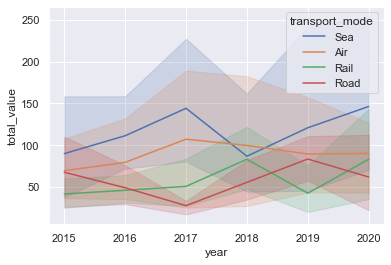

In [77]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="year",y="total_value",hue="transport_mode", data=dfmn )
# style=categoria que define estilo
# hue=categoria que da color

## 2 Medio de transporte utilizado


* Definiendo las variables por fechas

In [99]:
synergy_filename = "synergy_logistics_database.csv"
sldf = pd.read_csv(synergy_filename, parse_dates=[5])
sldf["month"] = sldf["date"].dt.month
sldf["año_mes"] = sldf["date"].dt.to_period("m")

* Histograma de los medios de transporte 2015-2020

<AxesSubplot:xlabel='transport_mode', ylabel='count'>

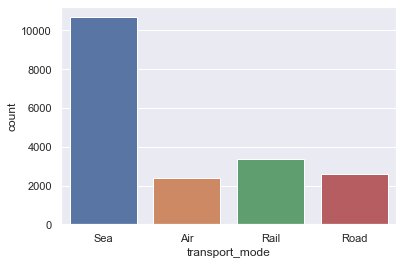

In [100]:
sns.countplot(data=sldf, x="transport_mode")

* Análisis por año 

In [97]:
transp_anual = sldf.groupby(by=['year', 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)
#pd.Series.sum en la columna total value crea la suma de los elementos

* Gráfico de los medios de transporte y su demanda en el tiempo

<AxesSubplot:xlabel='year', ylabel='conteo'>

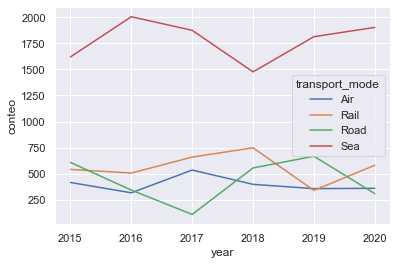

In [98]:
info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp
#No es posible introducir una columna nueva si los índices de la nueva columna no coinciden, es decir que coincidan la cant. de datos

#Graficando el uso de medios de transporte en el tiempo
sns.lineplot(x='year', y='conteo', hue='transport_mode', data=info)
#Esto crea el gráfico

* Gráfico demanda de medios de transporte 2015

<AxesSubplot:xlabel='month', ylabel='conteo'>

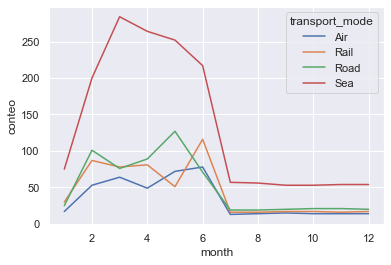

In [104]:
datos_2015 = sldf[ sldf['year'] == 2015 ]

transp_anual = datos_2015.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)


* Gráfico demanda de medios de transporte 2016

<AxesSubplot:xlabel='month', ylabel='conteo'>

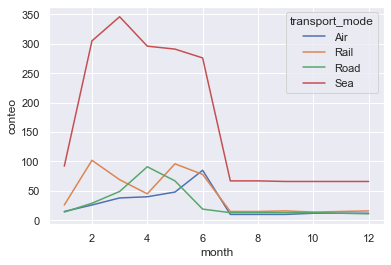

In [106]:
datos_2016 = sldf[ sldf['year'] == 2016 ]

transp_anual = datos_2016.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)


* Gráfico demanda de medios de transporte 2017

<AxesSubplot:xlabel='month', ylabel='conteo'>

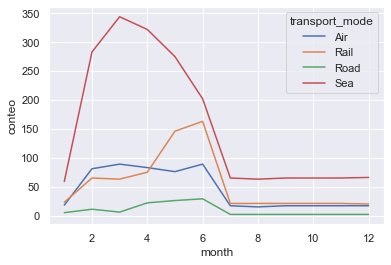

In [107]:
datos_2017 = sldf[ sldf['year'] == 2017 ]

transp_anual = datos_2017.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)


* Gráfico demanda de medios de transporte 2018

<AxesSubplot:xlabel='month', ylabel='conteo'>

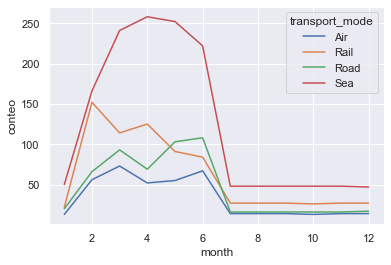

In [108]:
datos_2018 = sldf[ sldf['year'] == 2018 ]

transp_anual = datos_2018.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)


* Gráfico demanda de medios de transporte 2019

<AxesSubplot:xlabel='month', ylabel='conteo'>

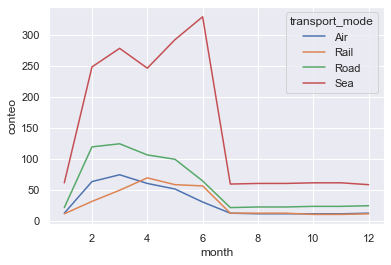

In [109]:
datos_2019 = sldf[ sldf['year'] == 2019 ]

transp_anual = datos_2019.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)

* Gráfico demanda de medios de transporte 2020

<AxesSubplot:xlabel='month', ylabel='conteo'>

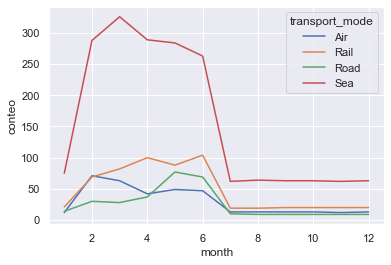

In [110]:
datos_2020 = sldf[ sldf['year'] == 2020 ]

transp_anual = datos_2020.groupby(by=["month", 'transport_mode'])
conteo_anual_transp = transp_anual['total_value'].describe()['count']
valor_anual_transp = transp_anual['total_value'].agg(pd.Series.sum)

info = pd.DataFrame()
info['conteo'] = conteo_anual_transp
info['valor'] = valor_anual_transp

sns.lineplot(x='month', y='conteo', hue='transport_mode', data=info)

## 3 Descripción de las rutas de importación y exportación de mayor demanda

In [111]:
sldb = pd.read_csv("synergy_logistics_database.csv", index_col=0, parse_dates=[5])
#esto nos permite ver todo el archivo

* Analizando las 10 rutas con mayor demanda

In [ ]:
# Filtrando especificamente las columnas
exportaciones=sldb[sldb["direction"]=="Exports"]
importaciones=sldb[sldb["direction"]=="Imports"]


* Agrupando los datos de interés:

In [112]:
# Agrupamos los datos de interés
rutas_exp=exportaciones.groupby(["origin","destination","transport_mode"])
rutas_imp=importaciones.groupby(["origin","destination","transport_mode"])

#Orden y obtención de las 10 rutas con mayor registro de exportaciones
top_rutas_exp=rutas_exp.count()["total_value"].sort_values(ascending=False).head(10)
top_rutas_imp=rutas_imp.count()["total_value"].sort_values(ascending=False).head(10)

* Top 10 rutas con mayor volúmen de exportaciones 2015-2020

In [ ]:
print("Top 10 de las rutas con mayor volúmen de registros por exportaciones 2015-2020")
top_rutas_exp

* Top 10 rutas con mayor volúmen de importaciones 2015-2020

In [ ]:
print("Top 10 de las rutas con mayor volúmen de registros por importaciones 2015-2020") 
top_rutas_imp

## Análisis por demanda y por ganancia
* Creando y describiendo el data frame

In [ ]:
rutas = sldb.groupby(['direction','origin', 'destination', 'transport_mode'])

suma = rutas.sum()['total_value']
rutas = rutas['total_value'].describe()

rutas['suma_total'] = suma
#calcula el valor total
rutas = rutas.reset_index()
#Divide el fram en series
rutas

* Comparación de las 10 rutas con mayor cantidad de operaciones

In [ ]:
exportaciones = rutas[ rutas['direction'] == 'Exports']
most_used = exportaciones.sort_values(by='count', ascending=False).head(10)
#Definición de series

valor_total_exportaciones = exportaciones['suma_total'].sum()
valor_total_top = most_used.suma_total.sum()
total_usos = most_used['count'].sum()
porcentaje = round((valor_total_top / valor_total_exportaciones)*100,2) 

print(f'Las 10 rutas más demandadas aportan {porcentaje}% de un total de {round(total_usos)} servicios operación')

* Comparación de las 10 rutas con mejores ingresos mediante funciones

In [ ]:
exportaciones = rutas[rutas['direction'] == 'Exports']
importaciones = rutas[rutas['direction'] == 'Imports']

def sol1(df, top=10):
    suma_total_df = df['suma_total'].sum()
    most_used = df.sort_values(by='suma_total', ascending=False).head(top)
    suma_total_top = most_used.suma_total.sum()

    total_usos = most_used['count'].sum()
    porcentaje = (suma_total_top / suma_total_df) * 10000
    porcentaje = int(porcentaje) / 100
    
    print(f'Las {top} rutas mas demandadas aportan {porcentaje}% de los ingresos, en un total de {round(total_usos)} servicios de operación')

* Resumen de análisis 

In [ ]:
print("Conclusiones en función de exportaciones:")
sol1(exportaciones)
sol1(exportaciones,15)

print("\n")

print("Conclusiones en función de importaciones:")
sol1(importaciones)
sol1(importaciones,15)